# o3 mini with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using o3 mini with prompt from 2/13/25.

The prompt is adjusted from the other v2.13 prompts to better suite the reasoning model's style based on the documentation.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import reasoning_instructions_v213
MODEL_ID = "o3-mini-2025-01-31"
SYSTEM_PROMPT = reasoning_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
len(df)

1084

In [3]:
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 7
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 8
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 51.1 s, sys: 6.81 s, total: 57.9 s
Wall time: 23min 13s


[{'0004.91306_cites_88240.txt': {'model': 'o3-mini-2025-01-31',
   'input_tokens': 805,
   'output_tokens': 591,
   'prediction': 'no',
   'confidence': 1.0,
   'rationale': 'The passage does not indicate that Texas v. Hardenberg (10 Wall. 68) was overruled; rather, it is cited and relied upon in subsequent decisions without any indication of conflict or overruling.',
   'raw_results': '{\n  "overruled": "no",\n  "confidence": 1.0,\n  "rationale": "The passage does not indicate that Texas v. Hardenberg (10 Wall. 68) was overruled; rather, it is cited and relied upon in subsequent decisions without any indication of conflict or overruling."\n}'}},
 {'0005.91306_cites_88693.txt': {'model': 'o3-mini-2025-01-31',
   'input_tokens': 807,
   'output_tokens': 857,
   'prediction': 'no',
   'confidence': 1.0,
   'rationale': 'The passage does not indicate that the Target Case (Huntington v. Texas, 16 Wall. 402) has been overruled. It is cited and its propositions are rehearsed, without any exp

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0004.91306_cites_88240.txt,o3-mini-2025-01-31,805,591,no,1.00,The passage does not indicate that Texas v. Ha...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."
1,0005.91306_cites_88693.txt,o3-mini-2025-01-31,807,857,no,1.00,The passage does not indicate that the Target ...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."
2,0003.91306_cites_87633.txt,o3-mini-2025-01-31,829,716,no,0.95,The passage states that the rules from Murray ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0001.91306_cites_88061.txt,o3-mini-2025-01-31,1578,851,yes,0.95,Passage 2 explicitly states that the position ...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.95..."
4,0008.91306_cites_90400.txt,o3-mini-2025-01-31,815,444,no,1.00,The passage cites the target case as reaffirmi...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/6.gpt/9.o3_mini_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/6.gpt/9.o3_mini_v213_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [9]:
assert len(df) == len(prediction_df)

In [10]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o3-mini-2025-01-31,1578,851,yes,0.95,Passage 2 explicitly states that the position ...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.95..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o3-mini-2025-01-31,1292,1602,no,0.95,The passages analyze Vermilye v. Adams Express...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o3-mini-2025-01-31,829,716,no,0.95,The passage states that the rules from Murray ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o3-mini-2025-01-31,805,591,no,1.00,The passage does not indicate that Texas v. Ha...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o3-mini-2025-01-31,807,857,no,1.00,The passage does not indicate that the Target ...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."


# Run evaluation

In [11]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [12]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["prediction"].value_counts()

prediction
no     949
yes    135
Name: count, dtype: int64

In [14]:
eval_df["input_tokens"].sum()

2074247

In [15]:
eval_df["output_tokens"].sum()

1465726

In [16]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [17]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.94      0.95      0.94       935
         Yes       0.66      0.60      0.63       149

    accuracy                           0.90      1084
   macro avg       0.80      0.77      0.79      1084
weighted avg       0.90      0.90      0.90      1084



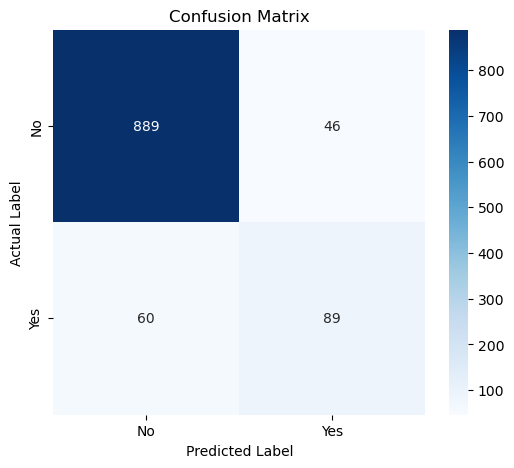

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [19]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.90
Precision: 0.66
Recall: 0.60
F-score: 0.63
Specificity: 0.95
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 89
True negatives: 889
False positives: 46
False negatives: 60


In [20]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

46

In [21]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

60

# Save the evaluation df

In [22]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,o3-mini-2025-01-31,1578,851,yes,0.95,Passage 2 explicitly states that the position ...,"{\n ""overruled"": ""yes"",\n ""confidence"": 0.95..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,o3-mini-2025-01-31,1292,1602,no,0.95,The passages analyze Vermilye v. Adams Express...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,o3-mini-2025-01-31,829,716,no,0.95,The passage states that the rules from Murray ...,"{\n ""overruled"": ""no"",\n ""confidence"": 0.95,..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,o3-mini-2025-01-31,805,591,no,1.00,The passage does not indicate that Texas v. Ha...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,o3-mini-2025-01-31,807,857,no,1.00,The passage does not indicate that the Target ...,"{\n ""overruled"": ""no"",\n ""confidence"": 1.0,\..."


In [23]:
eval_df.to_csv("predictions/6.gpt/9.o3_mini_v213_prompt_eval.csv", index=False)